In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler


plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
data = pd.read_pickle('cleaned_data.pkl')

In [3]:
data.head()

,my_win,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,picks_bans,radiant_score,start_time,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,abandons,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,net_worth,total_gold,total_xp,xp_per_min,id,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,legs,day_vision,night_vision,rad_dir_encoded,primary_attr_encoded,attack_type_encoded,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support
0,0,7192136714.00,63.00,3.00,117.00,37.00,2210.00,174.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 56, 'team': 0, '...",12.00,1686279398.00,1974.00,6.00,"[{'match_id': 7192136714, 'player_slot': 0, 'a...",52.00,1.00,3.00,Medusa,0.00,2.00,0.00,0.00,0.00,0.16,490.00,0.31,587.51,0.98,0.00,0.00,0.00,0.15,7.85,0.03,0.00,0.11,577.00,2.00,6.00,490.00,94.00,1,88.00,36.00,160.00,139.00,63.00,147.00,573.00,0.00,0.00,0.19,289.00,0.00,19.00,17753.00,18048.00,21252.00,577.00,94.00,0.25,75.00,0.00,-1.00,26.00,32.00,0.00,22.00,23.00,0.00,3.40,3.70,600.00,1200.00,1.70,100.00,0.50,275.00,0.60,0.00,1800.00,800.00,1,0,1,1,1,1,0,0,0,0,0
1,0,7192094259.00,0.00,63.00,117.00,24.00,2466.00,4.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 101, 'team': 1, ...",32.00,1686274920.00,0.00,1974.00,"[{'match_id': 7192094259, 'player_slot': 0, 'a...",52.00,1.00,130.00,Legion Commander,0.00,12.00,0.00,73.00,36.00,0.35,450.00,0.47,609.20,0.35,17.49,0.35,0.12,0.35,4.43,0.01,0.00,0.42,563.00,5.00,9.00,450.00,104.00,0,50.00,127.00,9.00,73.00,249.00,1.00,573.00,2.00,5.00,0.12,182.00,0.00,20.00,15285.00,18495.00,23139.00,563.00,104.00,0.25,75.00,0.00,0.00,35.00,39.00,25.00,18.00,20.00,3.30,1.70,2.20,150.00,900.00,1.70,100.00,0.46,330.00,0.60,2.00,1800.00,800.00,0,3,0,1,1,1,0,1,1,0,0
2,0,7190708297.00,63.00,0.00,117.00,55.00,2936.00,12.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 75, 'team': 0, '...",47.00,1686184376.00,1958.00,0.00,"[{'match_id': 7190708297, 'player_slot': 0, 'a...",52.00,1.00,2.00,Techies,0.00,20.00,0.00,218.00,349.00,0.32,329.00,0.66,669.77,0.55,2.55,0.42,0.10,0.84,3.35,0.00,0.00,0.86,635.00,13.00,2.00,329.00,105.00,1,931.00,102.00,73.00,0.00,232.00,254.00,676.00,1.00,5.00,0.10,164.00,0.00,23.00,13819.00,16099.00,31072.00,635.00,105.00,0.25,75.00,1.00,3.00,12.00,14.00,19.00,14.00,25.00,2.50,1.30,3.00,700.00,900.00,1.70,100.00,0.50,300.00,0.60,6.00,1800.00,800.00,1,1,1,0,1,0,0,0,1,0,0
3,1,7190665299.00,59.00,0.00,117.00,36.00,3068.00,48.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 50, 'team': 1, '...",29.00,1686179301.00,1792.00,0.00,"[{'match_id': 7190665299, 'player_slot': 0, 'a...",52.00,1.00,128.00,Techies,0.00,15.00,0.00,0.00,675.00,0.90,476.00,0.59,627.89,0.54,0.00,0.39,0.10,0.85,3.44,0.00,0.00,0.58,531.00,10.00,10.00,476.00,105.00,0,100.00,48.00,235.00,24.00,232.00,176.00,571.00,1.00,5.00,0.10,176.00,0.00,22.00,19788.00,24339.00,27151.00,531.00,105.00,0.25,75.00,1.00,3.00,12.00,14.00,19.00,14.00,25.00,2.50,1.30,3.00,700.00,900.00,1.70,100.00,0.50,300.00,0.60,6.00,1800.00,800.00,0,1,1,0,1,0,0,0,1,0,0
4,0,7190598564.00,51.00,51.00,117.00,46.00,3306.00,0.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 105, 'team': 1, ...",52.00,1686173036.00,260.00,1926.00,"[{'match_id': 7

In [4]:
data.shape

(5486, 95)

In [5]:
data.columns

Index(['my_win', 'match_id', 'barracks_status_dire', 'barracks_status_radiant',
       'cluster', 'dire_score', 'duration', 'first_blood_time', 'game_mode',
       'lobby_type', 'picks_bans', 'radiant_score', 'start_time',
       'tower_status_dire', 'tower_status_radiant', 'players', 'patch',
       'region', 'player_slot', 'hero', 'abandons', 'assists', 'backpack_0',
       'backpack_1', 'backpack_2', 'benchmarks.gold_per_min.pct',
       'benchmarks.gold_per_min.raw', 'benchmarks.hero_damage_per_min.pct',
       'benchmarks.hero_damage_per_min.raw',
       'benchmarks.hero_healing_per_min.pct',
       'benchmarks.hero_healing_per_min.raw', 'benchmarks.kills_per_min.pct',
       'benchmarks.kills_per_min.raw', 'benchmarks.last_hits_per_min.pct',
       'benchmarks.last_hits_per_min.raw', 'benchmarks.stuns_per_min.pct',
       'benchmarks.stuns_per_min.raw', 'benchmarks.xp_per_min.pct',
       'benchmarks.xp_per_min.raw', 'deaths', 'denies', 'gold_per_min',
       'hero_id', 'isRadian

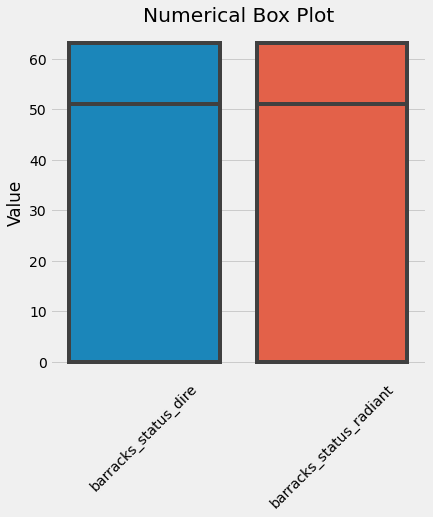

In [6]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['barracks_status_dire', 'barracks_status_radiant']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

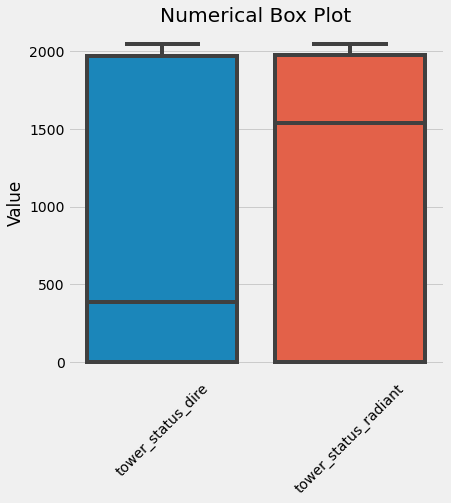

In [7]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['tower_status_dire', 'tower_status_radiant']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

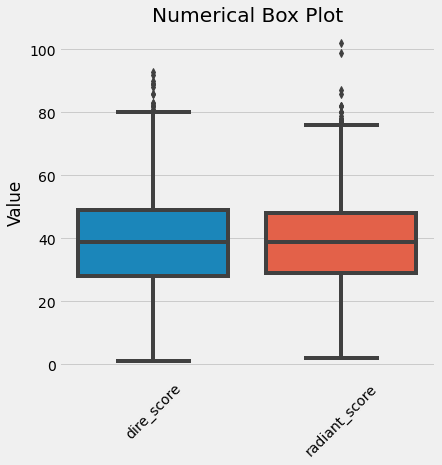

In [8]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['dire_score', 'radiant_score']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

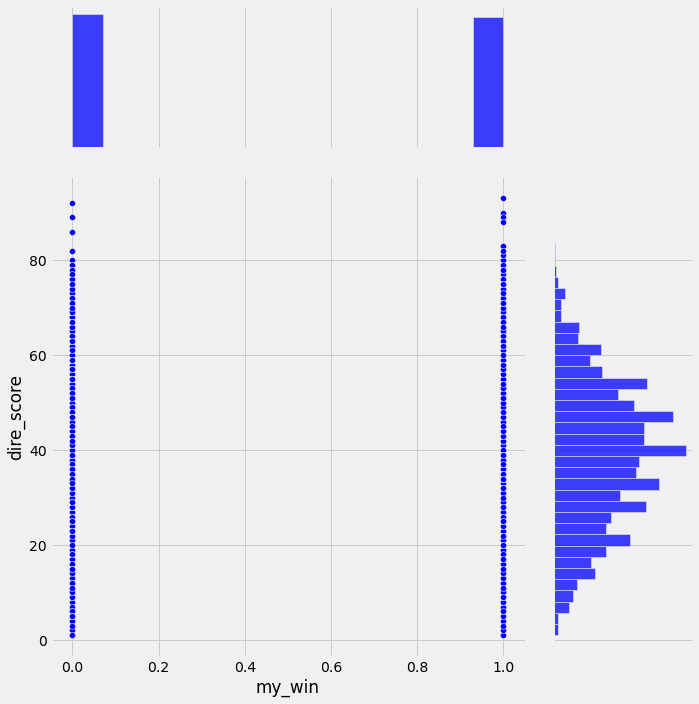

In [11]:
sns.jointplot(x="my_win", y="dire_score", data=data, height=10, ratio=3, color="blue")
plt.show()

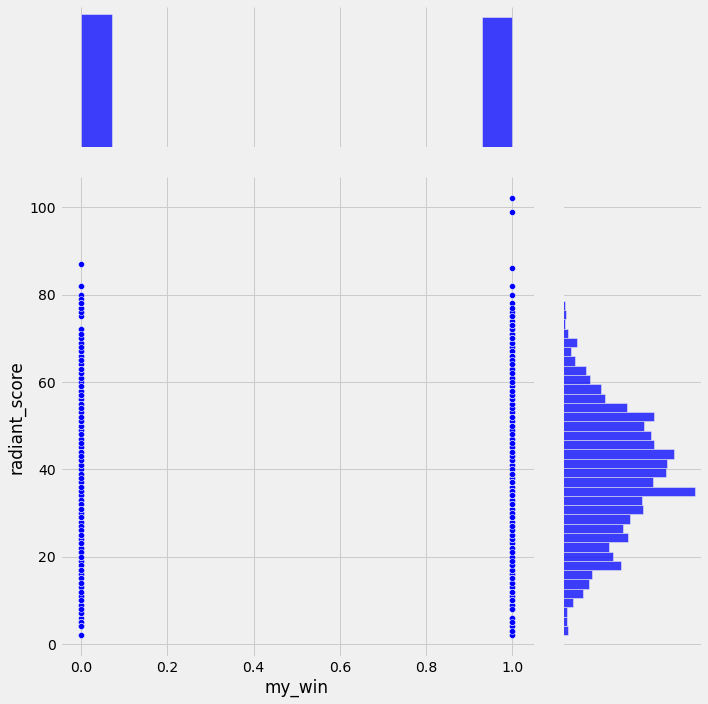

In [12]:
sns.jointplot(x="my_win", y="radiant_score", data=data, height=10, ratio=3, color="blue")
plt.show()

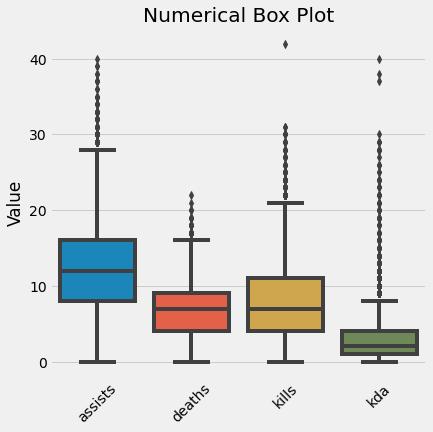

In [13]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['assists', 'deaths', 'kills', 'kda']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


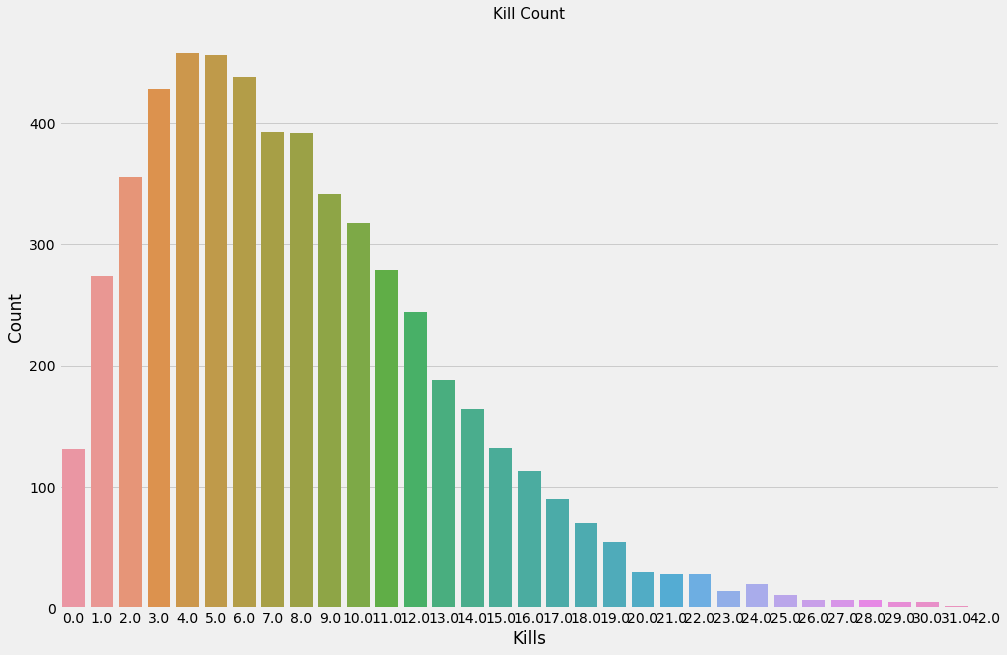

In [14]:
df = data.copy()
plt.figure(figsize=(15,10))
sns.countplot(df.kills.sort_values())
plt.title("Kill Count",fontsize=15)
plt.xlabel('Kills', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
# plt.savefig('kill_distribution.png')
plt.show()

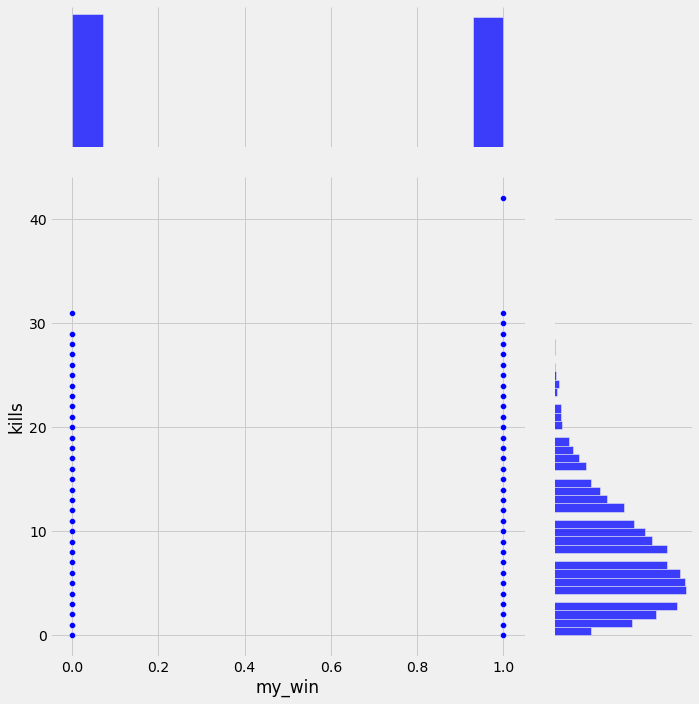

In [15]:
sns.jointplot(x="my_win", y="kills", data=df, height=10, ratio=3, color="blue")
plt.show()

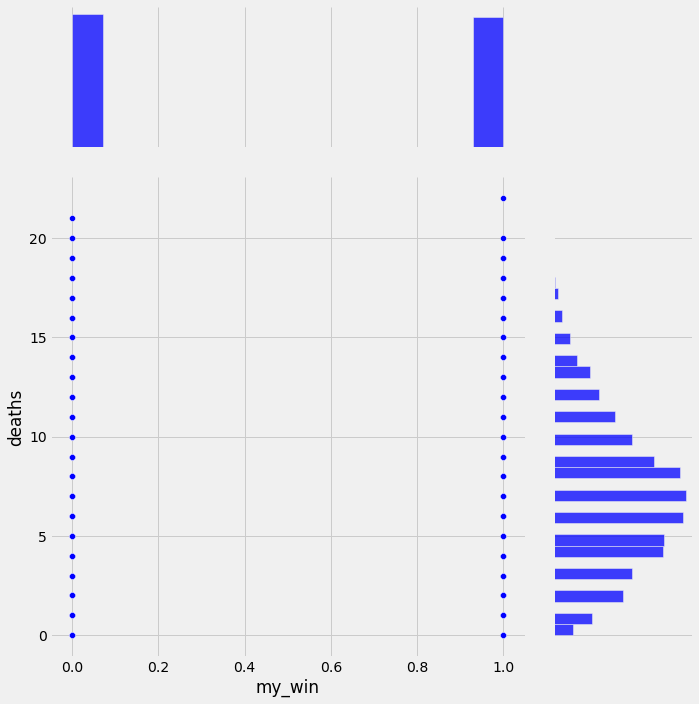

In [16]:
sns.jointplot(x="my_win", y="deaths", data=df, height=10, ratio=3, color="blue")
plt.show()

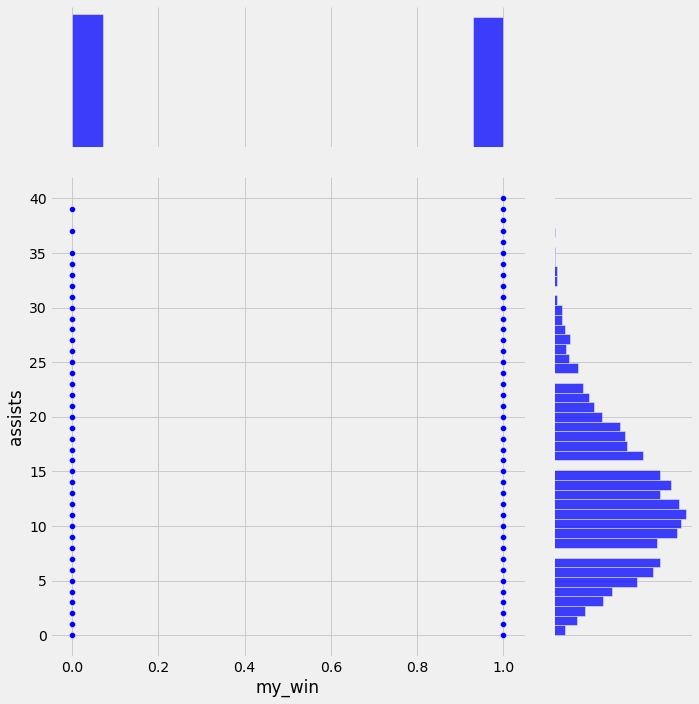

In [17]:
sns.jointplot(x="my_win", y="assists", data=df, height=10, ratio=3, color="blue")
plt.show()

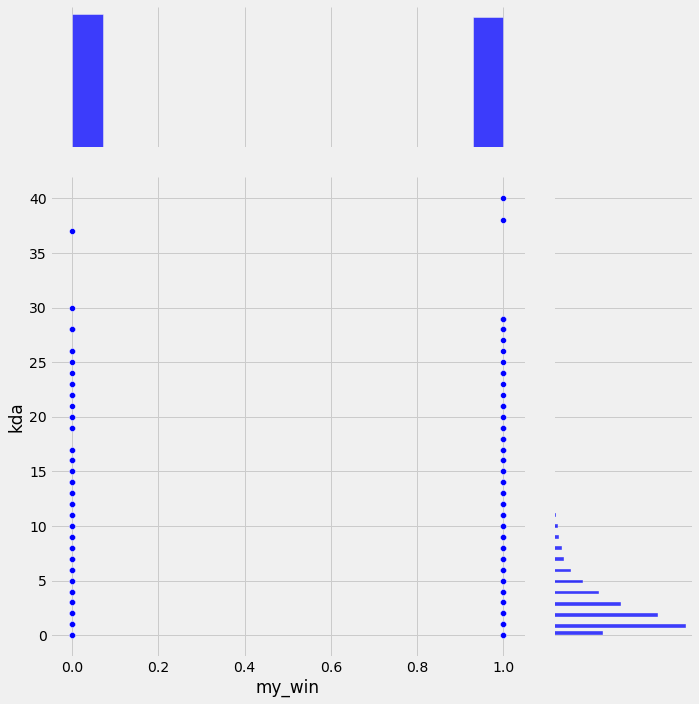

In [18]:
# Very correlated with winning. mmmm. what do I do wuth this?
sns.jointplot(x="my_win", y="kda", data=df, height=10, ratio=3, color="blue")
plt.show()

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


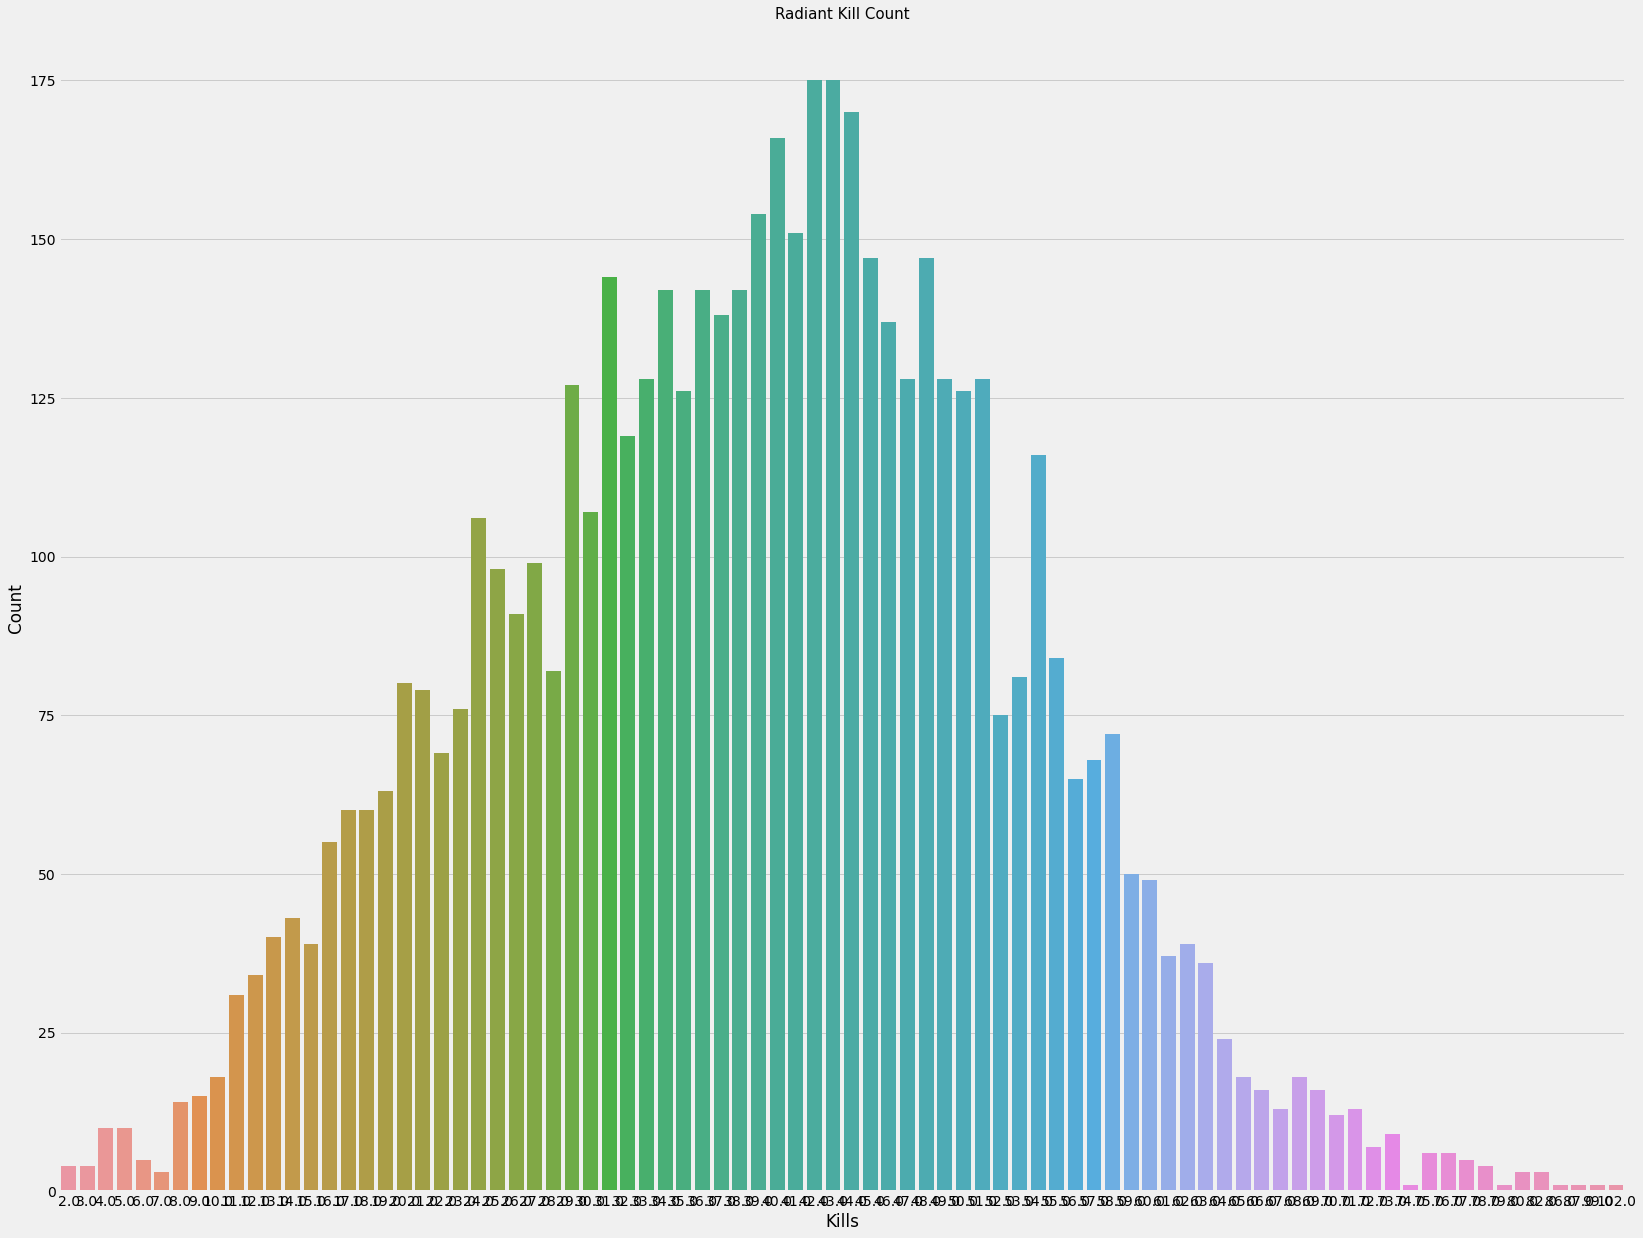

In [19]:
df = data.copy()
plt.figure(figsize=(25,20))
sns.countplot(df.radiant_score.sort_values())
plt.title("Radiant Kill Count",fontsize=15)
plt.xlabel('Kills', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
# plt.savefig('kill_distribution.png')
plt.show()

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


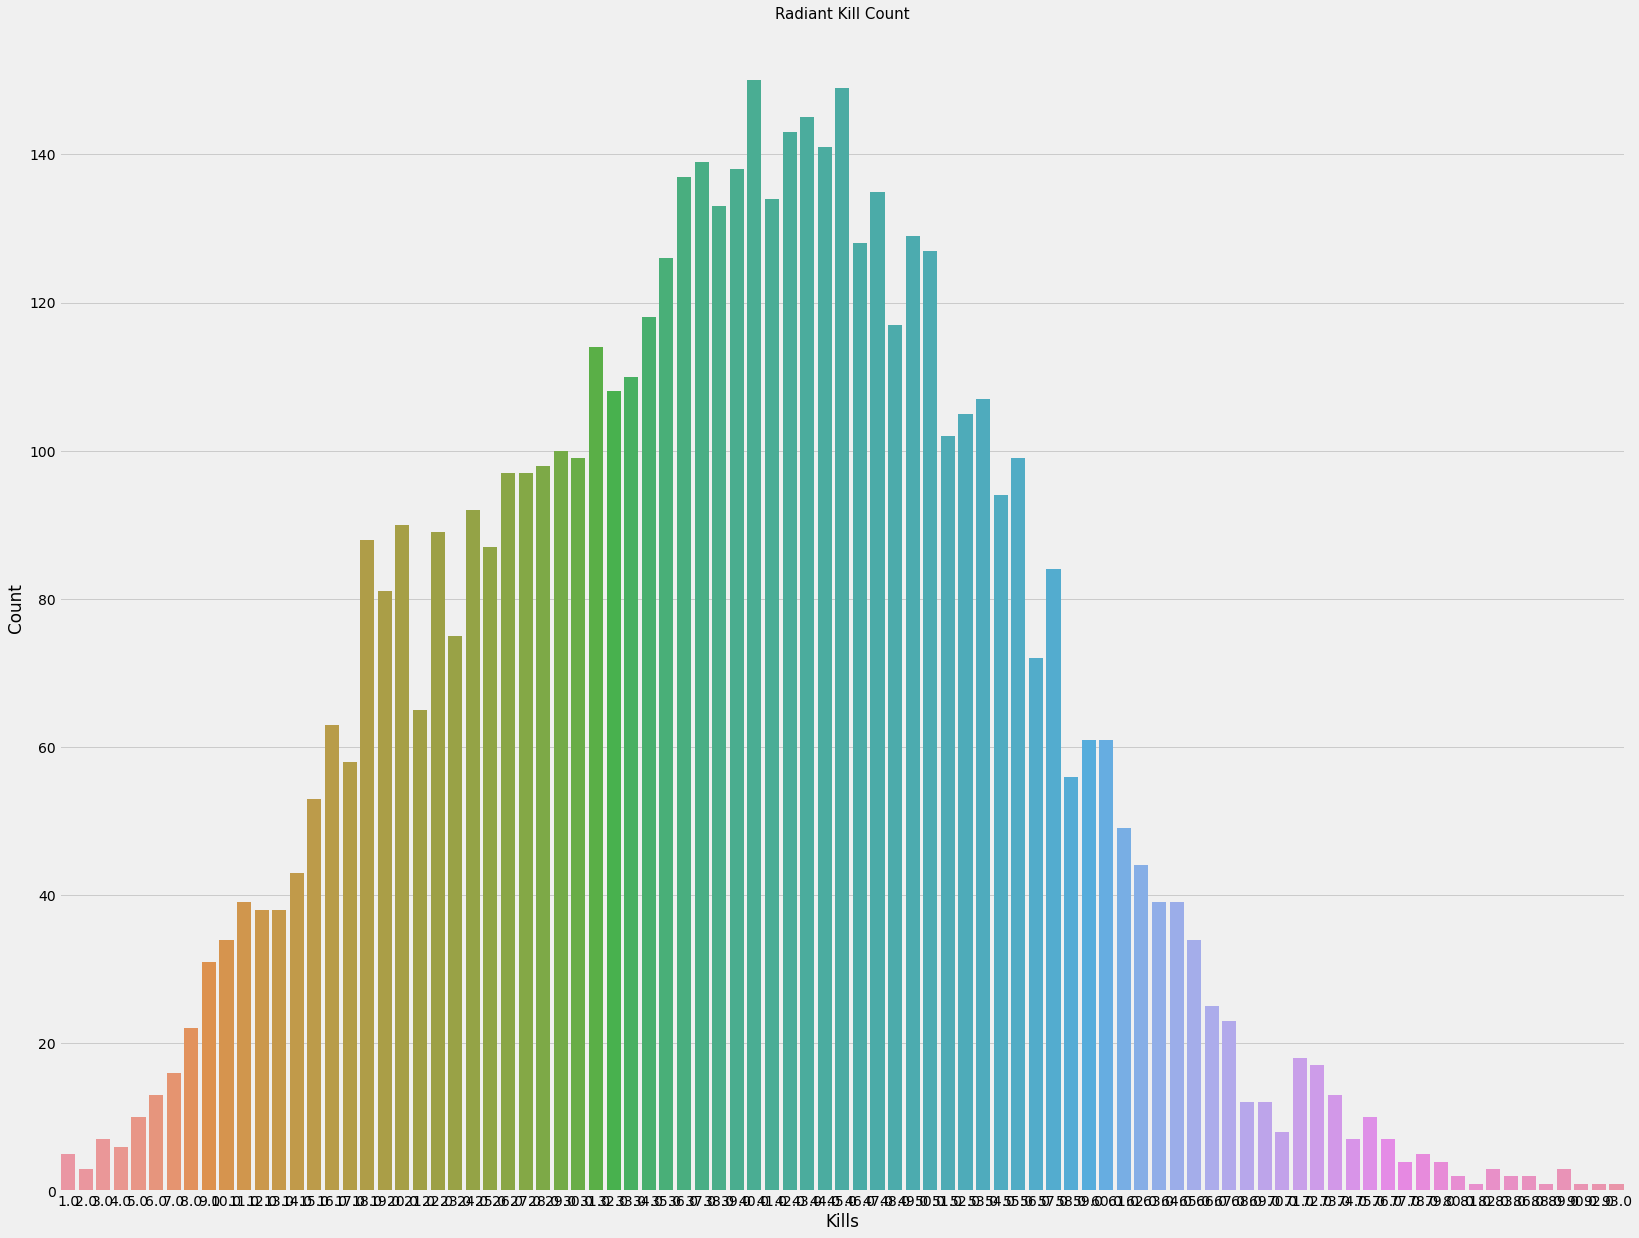

In [20]:
df = data.copy()
plt.figure(figsize=(25,20))
sns.countplot(df.dire_score.sort_values())
plt.title("Radiant Kill Count",fontsize=15)
plt.xlabel('Kills', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
# plt.savefig('kill_distribution.png')
plt.show()

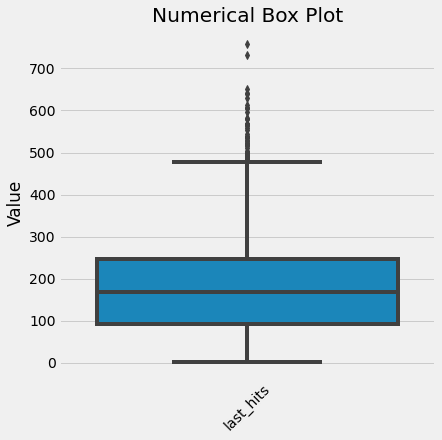

In [21]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['last_hits']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


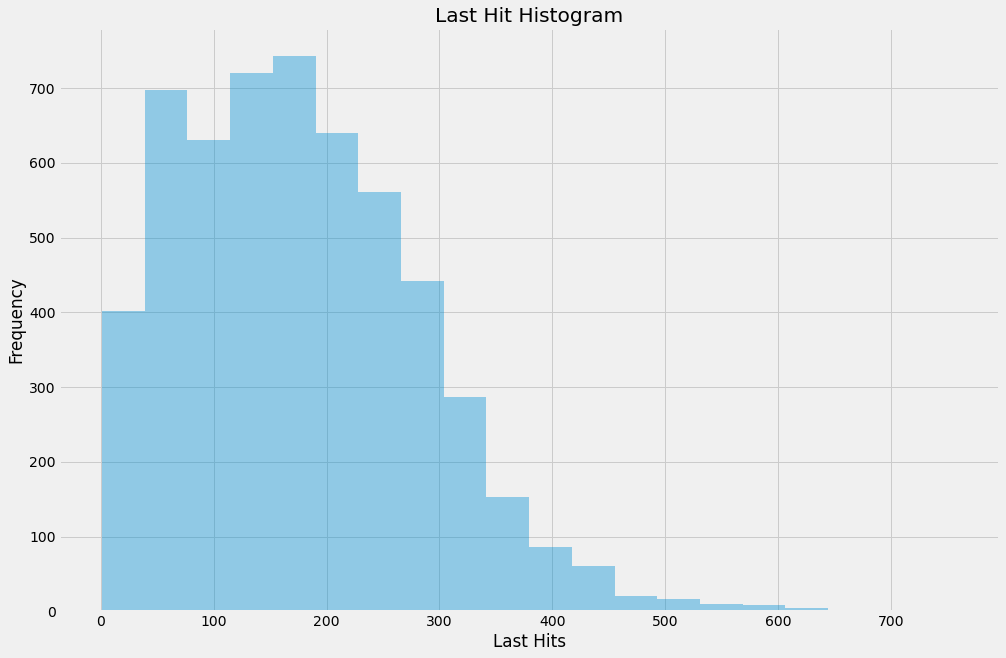

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(data.last_hits, kde=False, bins=20, label='Last Hits');
plt.title("Last Hit Histogram");
plt.xlabel('Last Hits');
plt.ylabel('Frequency');

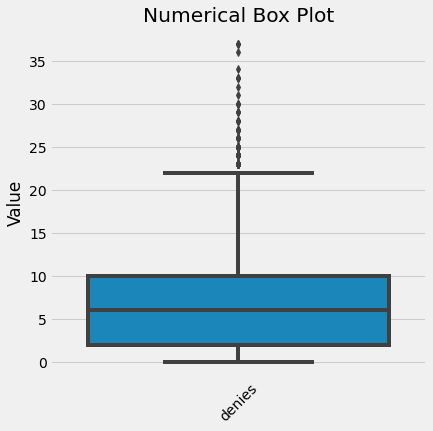

In [23]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['denies']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


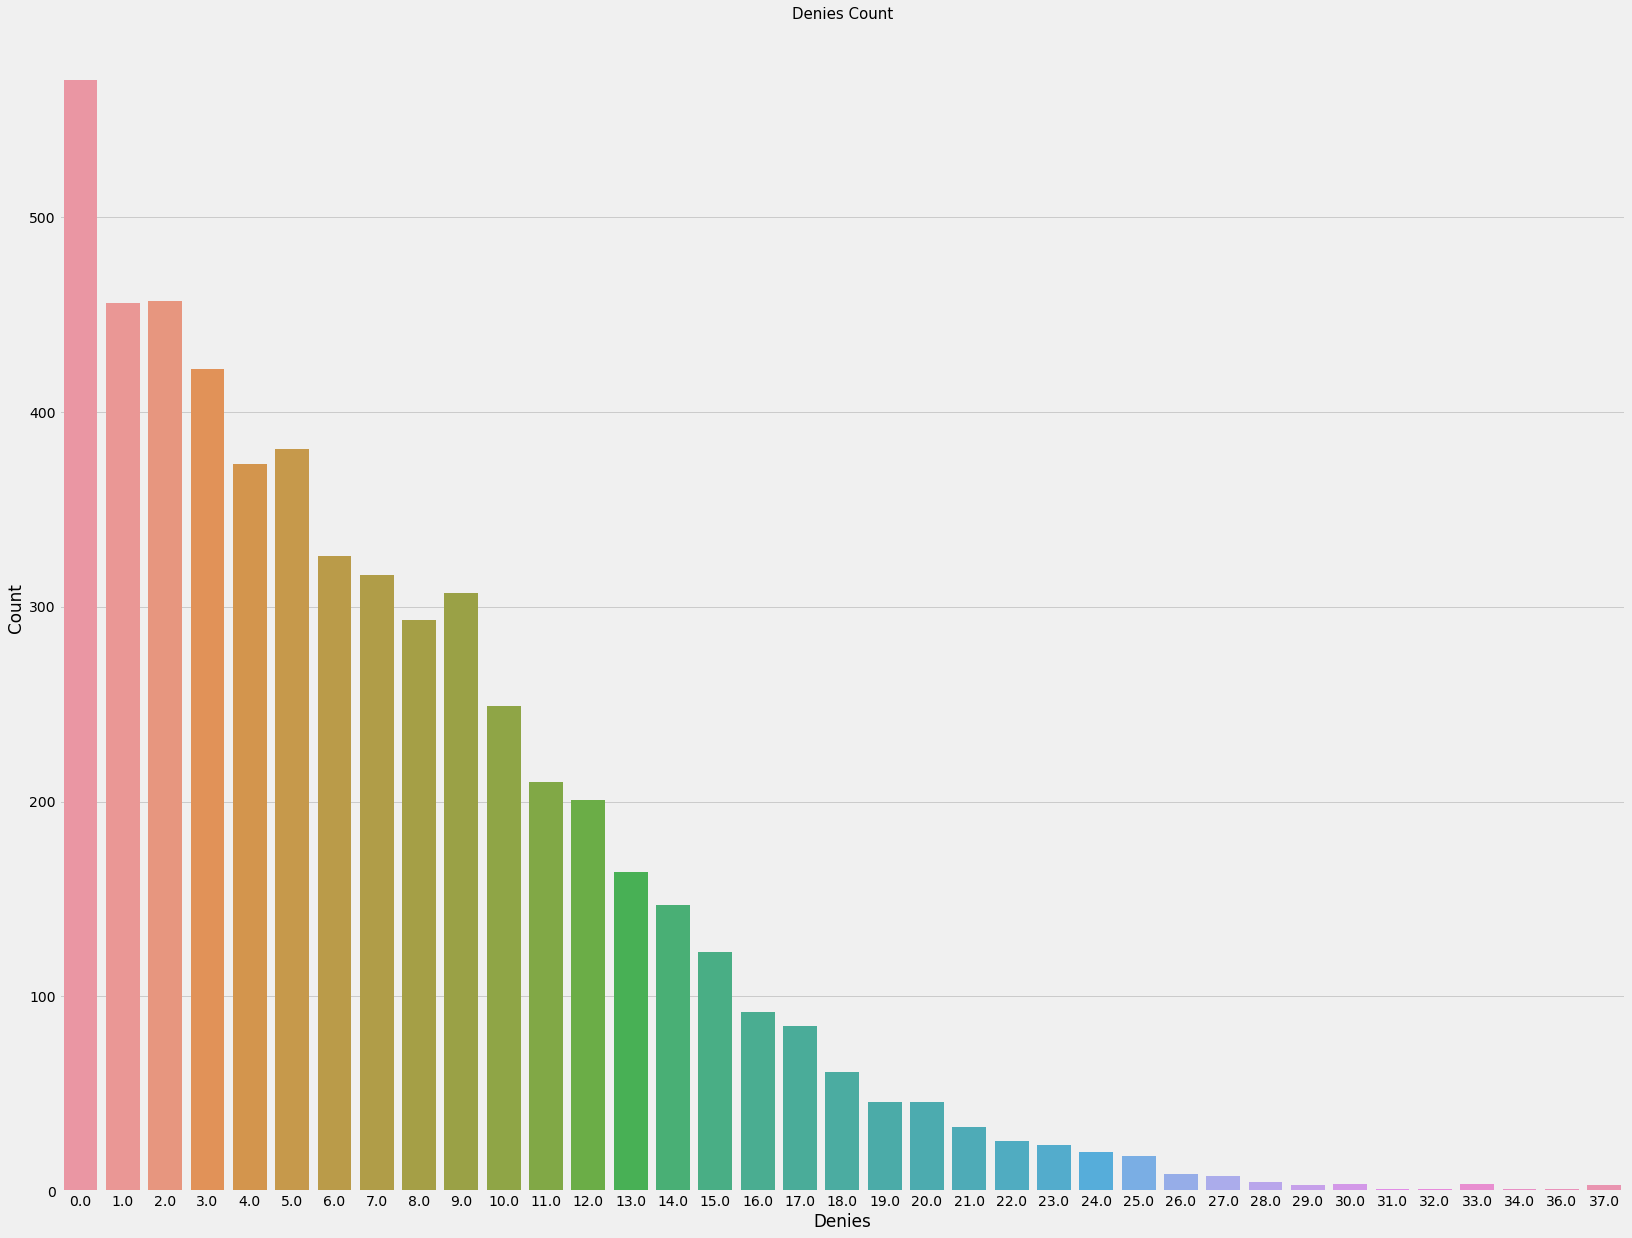

In [24]:
df = data.copy()
plt.figure(figsize=(25,20))
sns.countplot(df.denies.sort_values())
plt.title("Denies Count",fontsize=15)
plt.xlabel('Denies', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
# plt.savefig('kill_distribution.png')
plt.show()

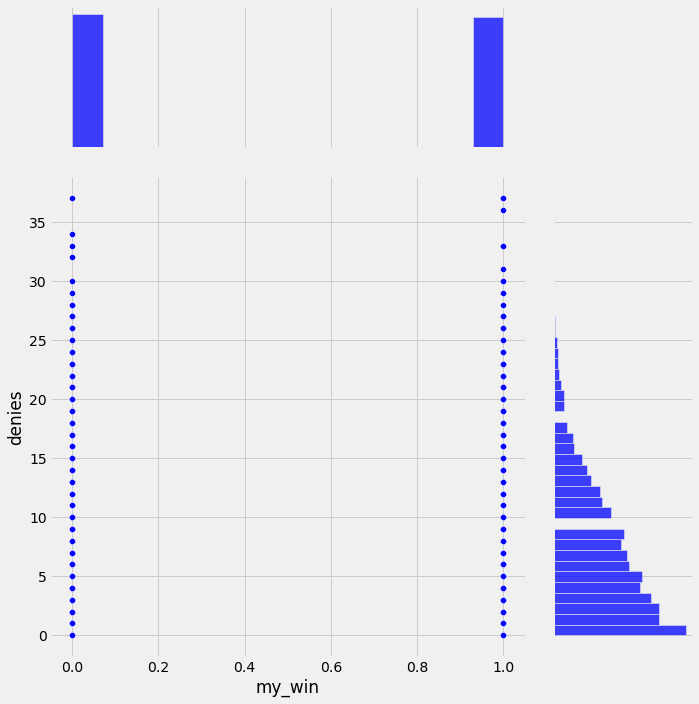

In [25]:
sns.jointplot(x="my_win", y="denies", data=df, height=10, ratio=3, color="blue")
plt.show()

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


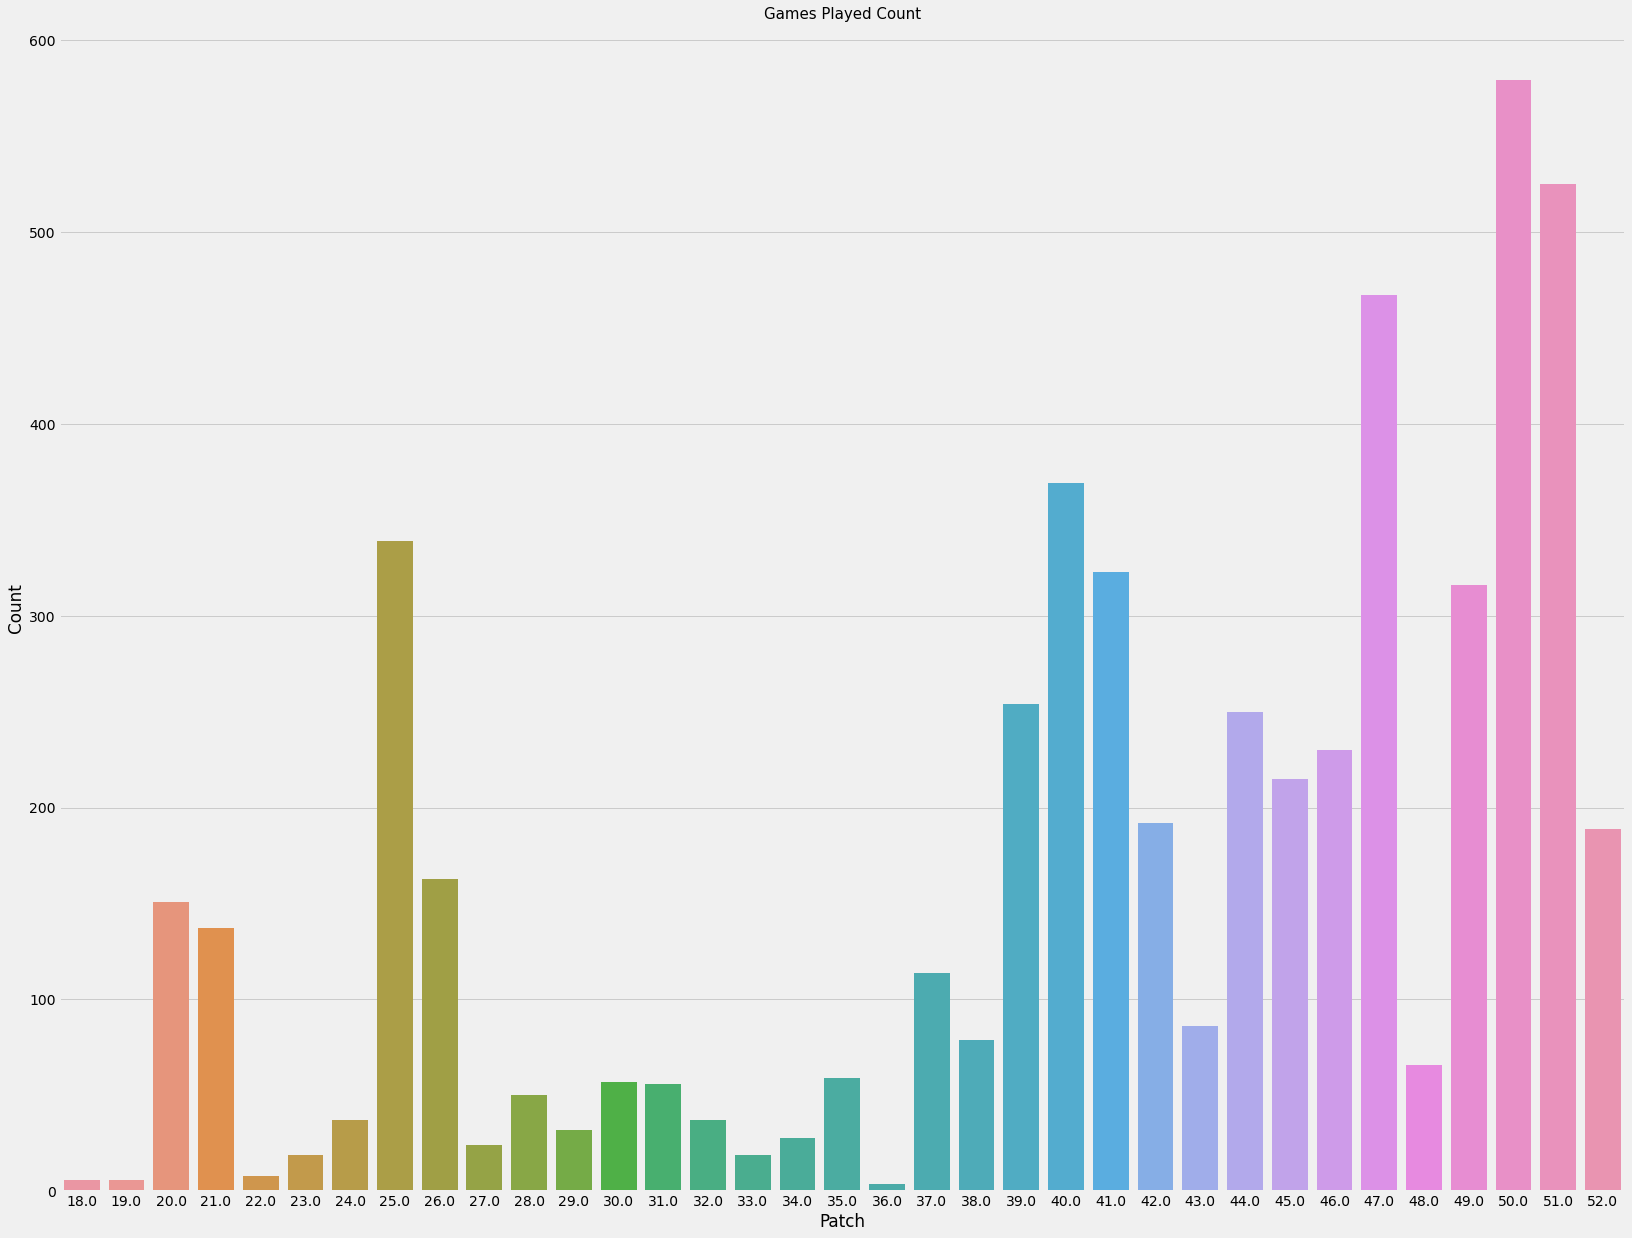

In [26]:
df = data.copy()
plt.figure(figsize=(25,20))
sns.countplot(df.patch.sort_values())
plt.title("Games Played Count",fontsize=15)
plt.xlabel('Patch', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
# plt.savefig('kill_distribution.png')
plt.show()

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


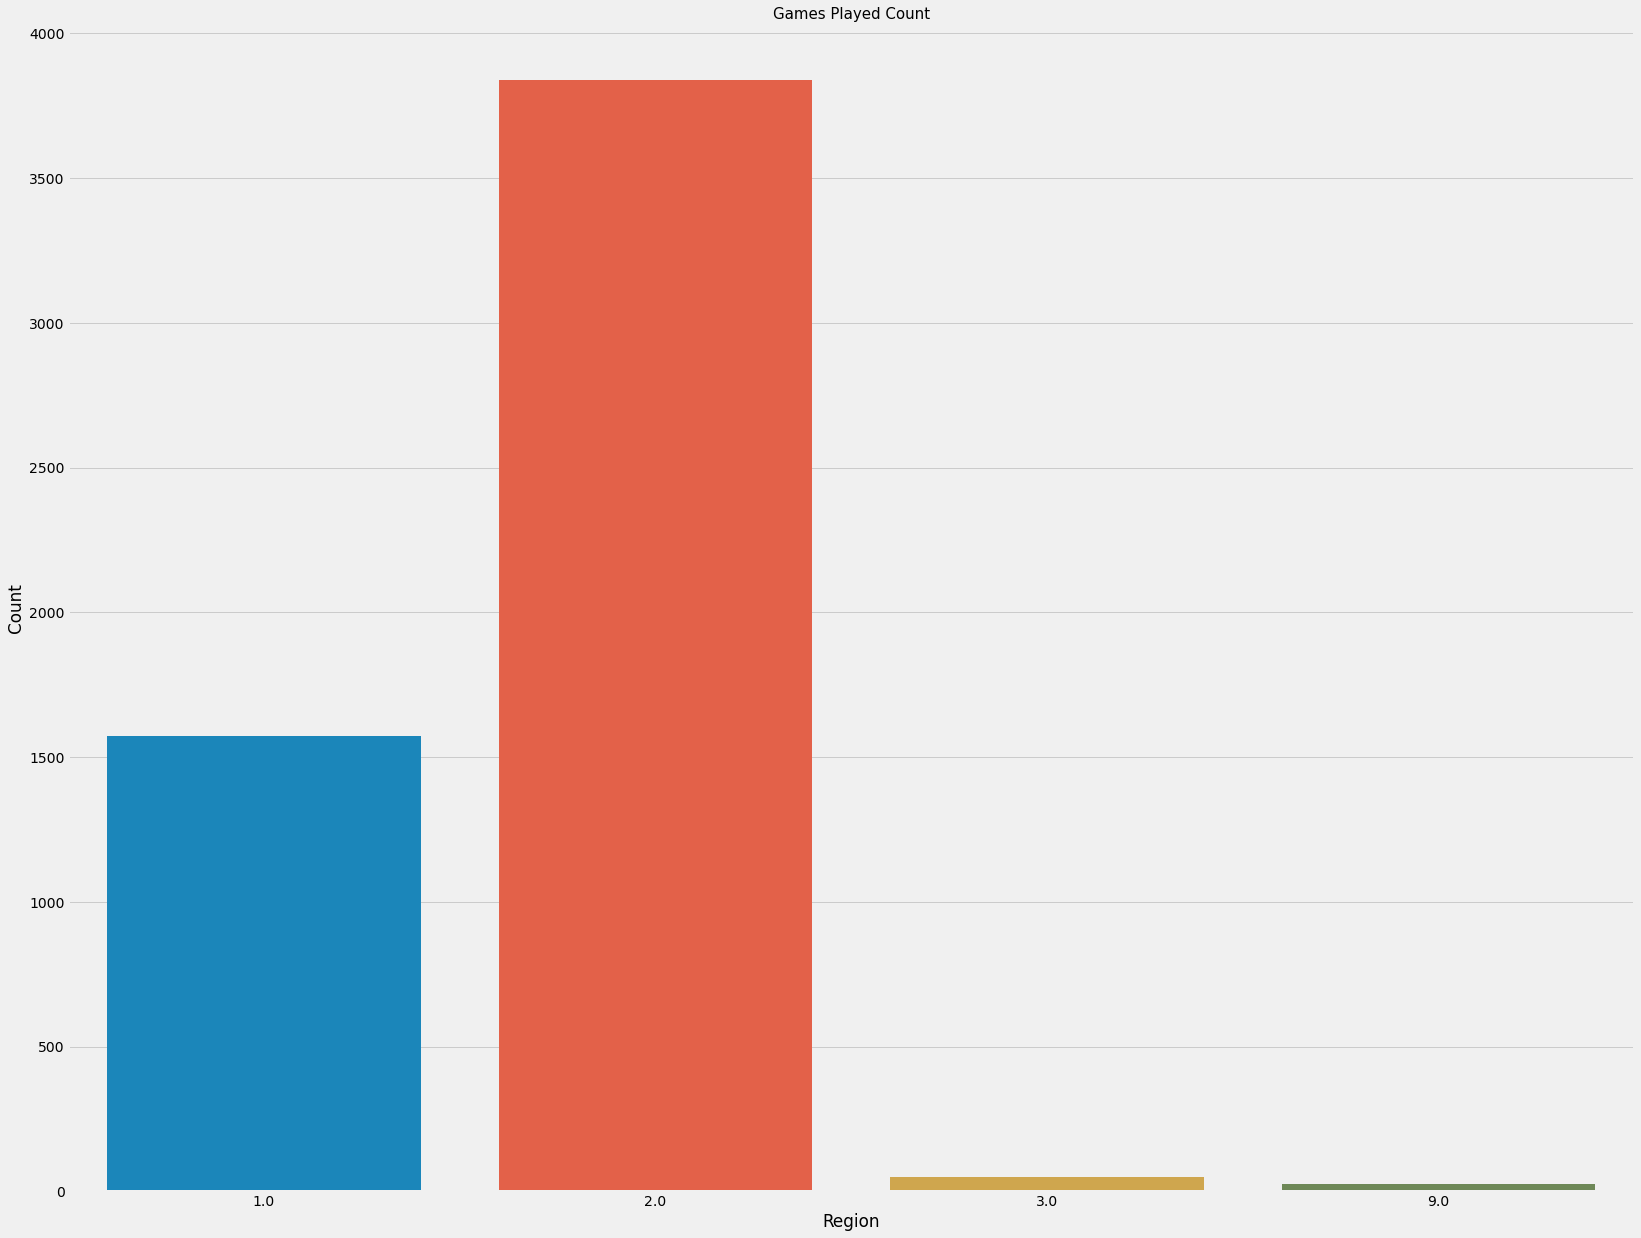

In [27]:
df = data.copy()
plt.figure(figsize=(25,20))
sns.countplot(df.region.sort_values())
plt.title("Games Played Count",fontsize=15)
plt.xlabel('Region', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
# plt.savefig('kill_distribution.png')
plt.show()

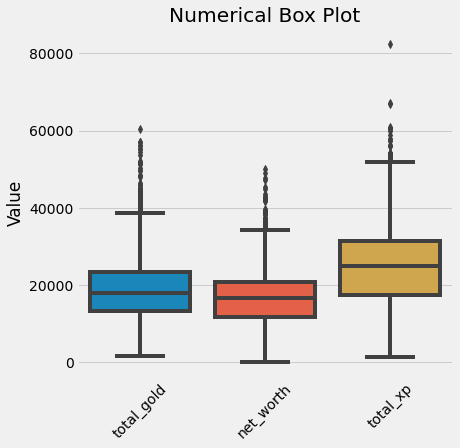

In [28]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['total_gold', 'net_worth', 'total_xp']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

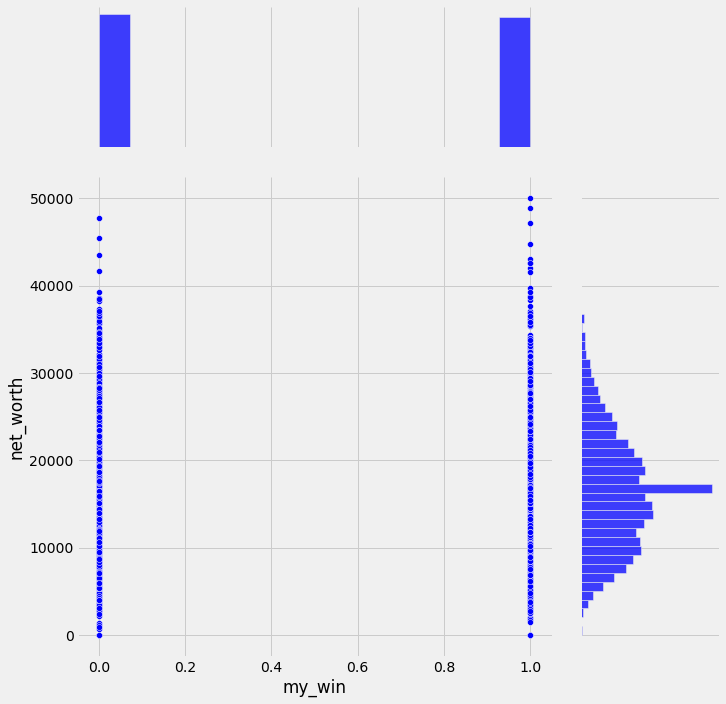

In [29]:
sns.jointplot(x="my_win", y="net_worth", data=df, height=10, ratio=3, color="blue")
plt.show()

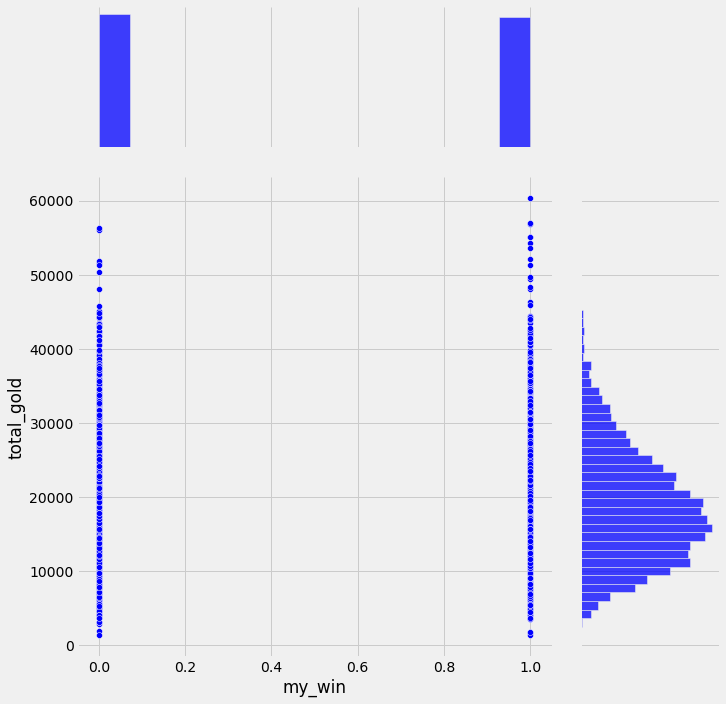

In [30]:
sns.jointplot(x="my_win", y="total_gold", data=df, height=10, ratio=3, color="blue")
plt.show()

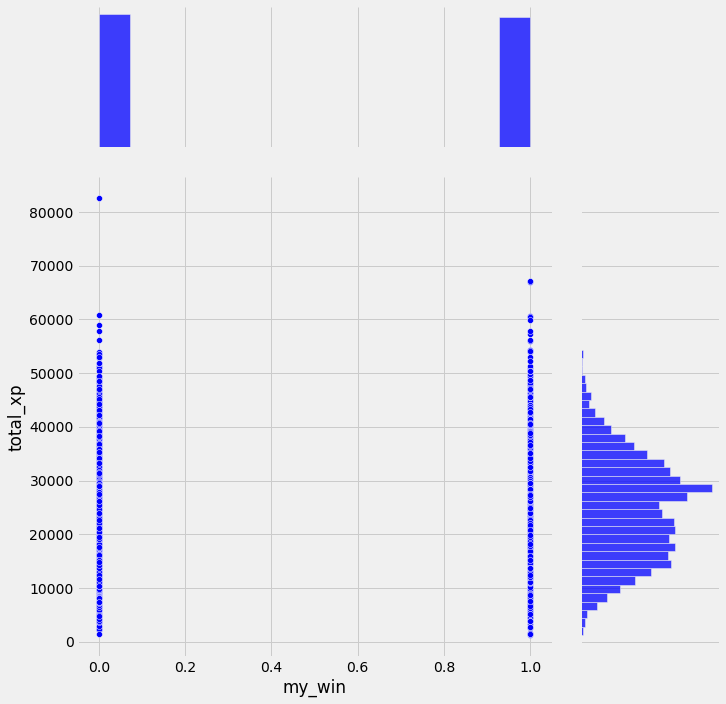

In [31]:
sns.jointplot(x="my_win", y="total_xp", data=df, height=10, ratio=3, color="blue")
plt.show()

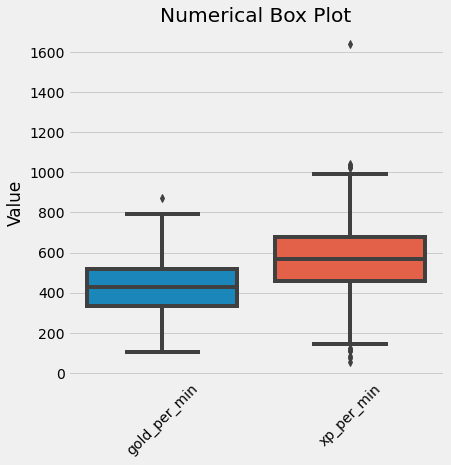

In [32]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['gold_per_min', 'xp_per_min']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

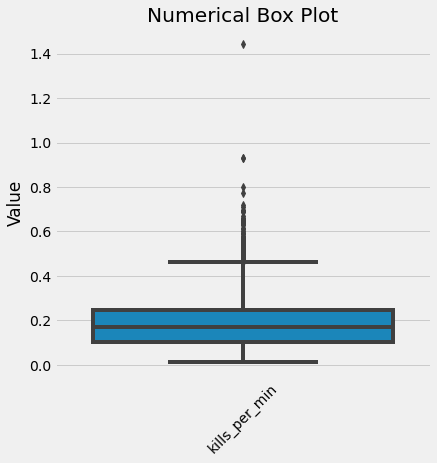

In [33]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['kills_per_min']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

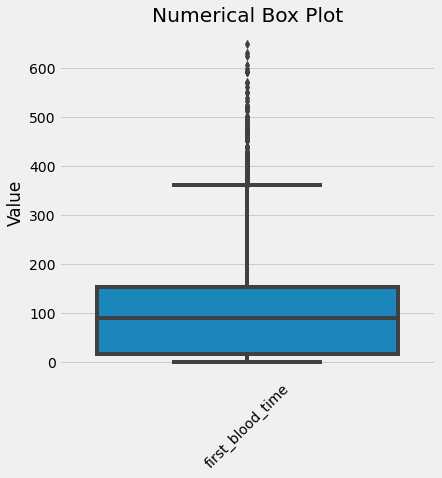

In [34]:
fig, my_ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=data[['first_blood_time']], ax = my_ax)
_ = my_ax.set_xticklabels(my_ax.get_xticklabels(),rotation=45)
plt.title("Numerical Box Plot");
plt.ylabel('Value');

In [35]:
data.head()

,my_win,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,picks_bans,radiant_score,start_time,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,abandons,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,net_worth,total_gold,total_xp,xp_per_min,id,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,legs,day_vision,night_vision,rad_dir_encoded,primary_attr_encoded,attack_type_encoded,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support
0,0,7192136714.00,63.00,3.00,117.00,37.00,2210.00,174.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 56, 'team': 0, '...",12.00,1686279398.00,1974.00,6.00,"[{'match_id': 7192136714, 'player_slot': 0, 'a...",52.00,1.00,3.00,Medusa,0.00,2.00,0.00,0.00,0.00,0.16,490.00,0.31,587.51,0.98,0.00,0.00,0.00,0.15,7.85,0.03,0.00,0.11,577.00,2.00,6.00,490.00,94.00,1,88.00,36.00,160.00,139.00,63.00,147.00,573.00,0.00,0.00,0.19,289.00,0.00,19.00,17753.00,18048.00,21252.00,577.00,94.00,0.25,75.00,0.00,-1.00,26.00,32.00,0.00,22.00,23.00,0.00,3.40,3.70,600.00,1200.00,1.70,100.00,0.50,275.00,0.60,0.00,1800.00,800.00,1,0,1,1,1,1,0,0,0,0,0
1,0,7192094259.00,0.00,63.00,117.00,24.00,2466.00,4.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 101, 'team': 1, ...",32.00,1686274920.00,0.00,1974.00,"[{'match_id': 7192094259, 'player_slot': 0, 'a...",52.00,1.00,130.00,Legion Commander,0.00,12.00,0.00,73.00,36.00,0.35,450.00,0.47,609.20,0.35,17.49,0.35,0.12,0.35,4.43,0.01,0.00,0.42,563.00,5.00,9.00,450.00,104.00,0,50.00,127.00,9.00,73.00,249.00,1.00,573.00,2.00,5.00,0.12,182.00,0.00,20.00,15285.00,18495.00,23139.00,563.00,104.00,0.25,75.00,0.00,0.00,35.00,39.00,25.00,18.00,20.00,3.30,1.70,2.20,150.00,900.00,1.70,100.00,0.46,330.00,0.60,2.00,1800.00,800.00,0,3,0,1,1,1,0,1,1,0,0
2,0,7190708297.00,63.00,0.00,117.00,55.00,2936.00,12.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 75, 'team': 0, '...",47.00,1686184376.00,1958.00,0.00,"[{'match_id': 7190708297, 'player_slot': 0, 'a...",52.00,1.00,2.00,Techies,0.00,20.00,0.00,218.00,349.00,0.32,329.00,0.66,669.77,0.55,2.55,0.42,0.10,0.84,3.35,0.00,0.00,0.86,635.00,13.00,2.00,329.00,105.00,1,931.00,102.00,73.00,0.00,232.00,254.00,676.00,1.00,5.00,0.10,164.00,0.00,23.00,13819.00,16099.00,31072.00,635.00,105.00,0.25,75.00,1.00,3.00,12.00,14.00,19.00,14.00,25.00,2.50,1.30,3.00,700.00,900.00,1.70,100.00,0.50,300.00,0.60,6.00,1800.00,800.00,1,1,1,0,1,0,0,0,1,0,0
3,1,7190665299.00,59.00,0.00,117.00,36.00,3068.00,48.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 50, 'team': 1, '...",29.00,1686179301.00,1792.00,0.00,"[{'match_id': 7190665299, 'player_slot': 0, 'a...",52.00,1.00,128.00,Techies,0.00,15.00,0.00,0.00,675.00,0.90,476.00,0.59,627.89,0.54,0.00,0.39,0.10,0.85,3.44,0.00,0.00,0.58,531.00,10.00,10.00,476.00,105.00,0,100.00,48.00,235.00,24.00,232.00,176.00,571.00,1.00,5.00,0.10,176.00,0.00,22.00,19788.00,24339.00,27151.00,531.00,105.00,0.25,75.00,1.00,3.00,12.00,14.00,19.00,14.00,25.00,2.50,1.30,3.00,700.00,900.00,1.70,100.00,0.50,300.00,0.60,6.00,1800.00,800.00,0,1,1,0,1,0,0,0,1,0,0
4,0,7190598564.00,51.00,51.00,117.00,46.00,3306.00,0.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 105, 'team': 1, ...",52.00,1686173036.00,260.00,1926.00,"[{'match_id': 7

In [36]:
data.describe()

,my_win,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,radiant_score,start_time,tower_status_dire,tower_status_radiant,patch,region,player_slot,abandons,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,net_worth,total_gold,total_xp,xp_per_min,id,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,legs,day_vision,night_vision,rad_dir_encoded,primary_attr_encoded,attack_type_encoded,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support
count,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00,5486.00
mean,0.49,5199307360.73,36.72,36.67,120.69,38.80,2585.01,106.28,20.83,5.78,38.77,1585692519.55,935.85,1009.50,41.20,1.76,65.59,0.00,12.55,35.34,20.96,21.23,0.27,429.23,0.06,79.45,0.72,4.25,0.48,0.18,0.23,4.05,0.38,0.03,0.35,563.37,7.03,6.98,429.23,43.67,0.50,116.57,133.87,124.68,114.95,102.16,135.00,224.20,3.03,7.90,0.19,177.19,0.03,22.05,16532.32,18815.58,24738.10,563.37,43.67,0.83,75.55,0.08,0.45,27.38,32.77,20.20,21.18,17.72,2.42,2.46,2.03,311.45,917.39,1.66,103.13,0.40,297.72,0.65,1.97,1799.82,836.78,0.50,0.90,0.39,0.84,0.56,0.33,0.52,0.37,0.49,0.33,0.18
std,0.50,1272645860.60,28.21,29.05,5.96,15.08,620.34,100.68,4.79,2.66,13.86,60030233.41,922.85,932.72,9.42,0.68,64.02,0.05,6.50,141.13,103.97,143.79,0.24,120.56,0.18,214.60,0.35,26.68,0.29,0.12,0.24,2.08,0.39,0.24,0.26,149.36,3.64,5.87,120.56,35.75,0.50,121.51,146.14,96.08,144.33,128.94,141.21,258.55,3.39,5.27,0.11,105.87,0.21,4.37,6834.57,7771.35,9544.53,149.36,35.75,0.65,4.94,0.21,1.30,8.21,9.01,3.87,6.84,3.94,0.60,0.82,0.75,190.81,625.20,0.11,7.87,0.10,13.22,0.10,0.89,13.50,156.89,0.50,1.23,0.49,0.36,0.50,0.47,0.50,0.48,0.50,0.47,0.38
min,0.00,2814508829.00,0.00,0.00,111.00,1.00,406.00,0.00,1.00,0.00,2.00,1480554318.00,0.00,0.00,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,105.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,55.00,0.00,0.00,105.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.00,0.00,4.00,1.00,1380.00,1204.00,55.00,1.00,0.25,75.00,0.00,-3.00,6.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,150.00,0.00,1.40,90.00,0.17,275.00,0.60,0.00,800.00,800.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,4055660297.50,0.00,0.00,118.00,28.00,2149.25,16.00,22.00,7.00,29.00,1534052463.75,0.00,0.00,38.00,1.00,2.00,0.00,8.00,0.00,0.00,0.00,0.07,336.00,0.00,0.00,0.64,0.00,0.23,0.10,0.06,2.36,0.00,0.00,0.14,457.00,4.00,2.00,336.00,8.00,0.00,50.00,63.00,63.00,48.00,29.00,36.00,0.00,1.00,4.00,0.10,92.00,0.00,19.00,11511.00,13115.00,17339.25,457.00,8.00,0.25,

In [37]:
dire_IQR = 49 - 28
print(dire_IQR)
print("lower interval", 28 - 1.5 * dire_IQR)
print("higher interval", 49 + 1.5 * dire_IQR)

21
lower interval -3.5
higher interval 80.5


In [38]:
radiant_IQR = 48 - 29
print(radiant_IQR)
print("lower interval", 29 - 1.5 * radiant_IQR)
print("higher interval", 48 + 1.5 * radiant_IQR)

19
lower interval 0.5
higher interval 76.5


In [39]:
deaths_IQR = 9 - 4
print(deaths_IQR)
print("lower interval", 4 - 1.5 * deaths_IQR)
print("higher interval", 9 + 1.5 * deaths_IQR)

5
lower interval -3.5
higher interval 16.5


In [40]:
denies_IQR = 10 - 2
print(denies_IQR)
print("lower interval", 2 - 1.5 * denies_IQR)
print("higher interval", 10 + 1.5 * denies_IQR)

8
lower interval -10.0
higher interval 22.0


In [41]:
level_IQR = 25 - 19
print(level_IQR)
print("lower interval", 19 - 1.5 * level_IQR)
print("higher interval", 25 + 1.5 * level_IQR)

6
lower interval 10.0
higher interval 34.0


In [42]:
nw_IQR = 20626 - 11490.25
print(nw_IQR)
print("lower interval", 11490.25 - 1.5 * nw_IQR)
print("higher interval", 20626 + 1.5 * nw_IQR)

9135.75
lower interval -2213.375
higher interval 34329.625


In [43]:
gold_IQR = 23357.50 - 13106.25
print(gold_IQR)
print("lower interval", 13106.25 - 1.5 * gold_IQR)
print("higher interval", 23357.50 + 1.5 * gold_IQR)

10251.25
lower interval -2270.625
higher interval 38734.375


In [44]:
xp_IQR = 31279.75 - 17343.25
print(xp_IQR)
print("lower interval", 17343.25 - 1.5 * xp_IQR)
print("higher interval", 31279.75 + 1.5 * xp_IQR)

13936.5
lower interval -3561.5
higher interval 52184.5


In [45]:
# rate 75% - 25%
kda_IQR = 4 - 1
print(kda_IQR)
print("lower interval", 1 - 1.5 * kda_IQR)
print("higher interval", 4 + 1.5 * kda_IQR)

3
lower interval -3.5
higher interval 8.5


In [46]:
kill_IQR = 11 - 4
print(kill_IQR)
print("lower interval", 4 - 1.5 * kill_IQR)
print("higher interval",11 + 1.5 * kill_IQR)

7
lower interval -6.5
higher interval 21.5


In [47]:
lh_IQR = 246 - 93
print(lh_IQR)
print("lower interval", 93 - 1.5 * lh_IQR)
print("higher interval", 246 + 1.5 * lh_IQR)

153
lower interval -136.5
higher interval 475.5


In [48]:
assists_IQR = 16 - 8
print(assists_IQR)
print("lower interval", 8 - 1.5 * assists_IQR)
print("higher interval", 16 + 1.5 * assists_IQR)

8
lower interval -4.0
higher interval 28.0
